In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

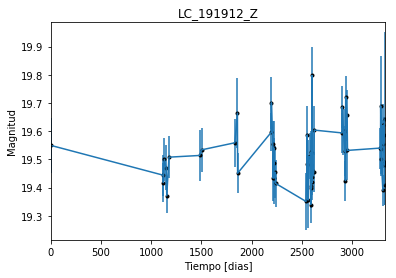

In [2]:
 data = np.genfromtxt('LC_191912_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191912_Z')
plt.savefig("LC_191912_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

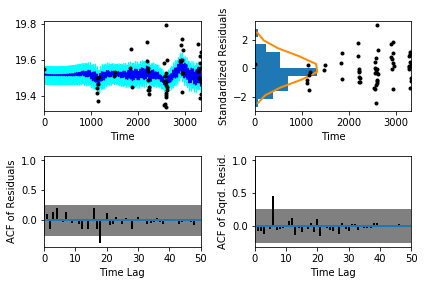

In [5]:
sample.assess_fit()

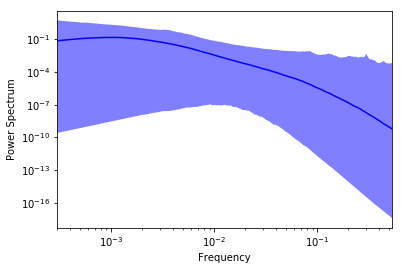

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

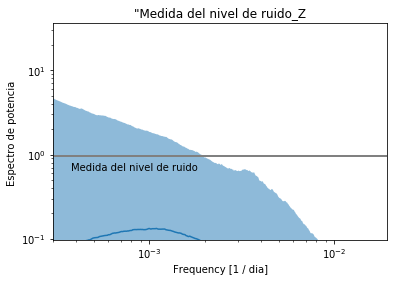

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191912_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191912_Z')

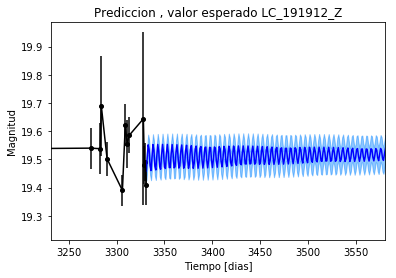

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191912_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191912_Z')

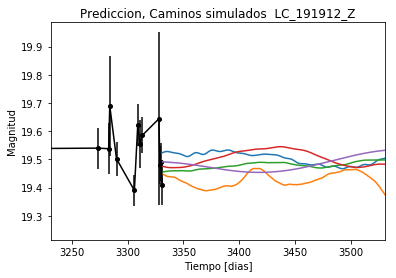

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191912_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


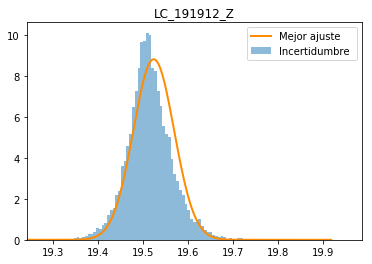

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191912_Z')
plt.savefig("Mejor_ajuste_LC_191912_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191912_Z')

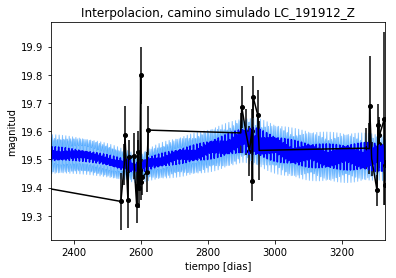

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_191912_Z')

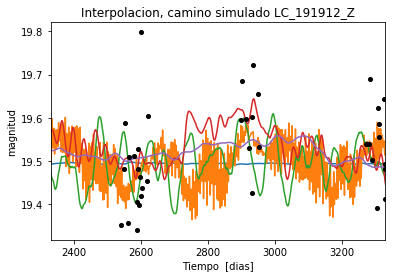

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1171.21455333
Median: 0.00825203078548
Standard deviation: 0.166726691905
68% credibility interval: [ 0.00079904  0.14021171]
95% credibility interval: [  3.42402102e-04   6.52898229e-01]
99% credibility interval: [  3.03714521e-04   9.39439572e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1272.13485811
Median: 0.00316774870891
Standard deviation: 0.10764478582
68% credibility interval: [ 0.00059898  0.05054383]
95% credibility interval: [  3.27137673e-04   3.74411968e-01]
99% credibility interval: [  3.02509673e-04   7.55038169e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1111.35494043
Median: 0.0114128550693


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1267.92975435
Median: 82.3594703137
Standard deviation: 1.58295410021
68% credibility interval: [ 80.68624877  83.67448259]
95% credibility interval: [ 78.44881238  84.44443104]
99% credibility interval: [ 76.50666198  85.29525736]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 860.272422425
Median: 0.526744965299
Standard deviation: 2.19199510884
68% credibility interval: [ 0.05639804  3.37432208]
95% credibility interval: [ 0.01658331  7.66143813]
99% credibility interval: [  1.06873815e-02   1.16715806e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1875.0936486
Median: 0.729484359749
Standard deviation: 11.833003186
68% credibility interval: [  0.023779    14.20903093]
95% credibility interval: [  1.5

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 111454.341978
Median: 1067102.24722
Standard deviation: 2.61567301195e+115
68% credibility interval: [  1.58933724e-35   2.37443843e+48]
95% credibility interval: [  7.32733567e-086   5.24587838e+106]
99% credibility interval: [  2.93050307e-106   9.89796385e+113]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2440.75394551
Median: 19.5076186895
Standard deviation: 0.0227914233053
68% credibility interval: [ 19.49009157  19.52714009]
95% credibility interval: [ 19.46373093  19.55464908]
99% credibility interval: [ 19.43272357  19.58885345]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 998.750305193
Median: 0.0663188242214
Standard deviation: 0.276475254235
68% credibility interval: [ 0.          0.51289955]
95% credibility interval: [ 0.          0.93287938]
99% credibility interval: [ 0.          1.02755211]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 998.750305193
Median: 0.0663188242214
Standard deviation: 0.276475254235
68% credibility interval: [ 0.          0.51289955]
95% credibility interval: [ 0.          0.93287938]
99% credibility interval: [ 0.          1.02755211]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 324.834100246
Median: 0.0
Standard deviation: 0.0785997007066
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1267.92975435
Median: 82.3594703137
Standard deviation: 1.58295410021
68% credibility interval: [ 80.68624877  83.67448259]
95% credibility interval: [ 78.44881238  84.44443104]
99% credibility interval: [ 76.50666198  85.29525736]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3838.30574215
Median: 0.00209426220007
Standard deviation: 0.00369866650635
68% credibility interval: [ 0.00069854  0.00498641]
95% credibility interval: [  5.78487751e-05   1.16914360e-02]
99% credibility interval: [  3.33190088e-06   2.24077225e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2077.7945485
Median: 1.11412580137
Standard deviation: 0.175315894925
68% credibility interval: [ 0.95794113  1.30112444]
95% credibility interval: [ 0.83185403  1.51892011]
99% credibility interval: [ 0.76066589  1.66766038]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 3245.32108144
Median: 5.44776236973e-09
Standard deviation: 0.50429786541
68% credibility interval: [  1.49795456e-51   7.87790351e-04]
95% credibility interval: [  3.26085007e-109   1.42508548e-001]
99% credibility interval: [  1.22337460e-115   1.98324525e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1171.21455333
Median: (-0.0518490385857-1.78699960453j)
Standard deviation: 2.02856757138
68% credibility interval: [-0.88097618-1.40692218j -0.00502052-0.62404583j]
95% credibility interval: [ -4.10228056e+00-0.76237388j  -2.15137586e-03-0.27158124j]
99% credibility interval: [ -5.90267291e+00-2.96194895j  -1.90829462e-03-3.72544824j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1272.13485811
Median: (-0.0199035521447+0j)
Standard deviation: 1.86416894364
68% credibility interval: [-0.31757627+6.40666305j -0.00376353+0.64134863j]
95% credibility interval: [ -2.35249978e+00+1.96967266j  -2.05546662e-03+3.57922069j]
99% credibility interval: [ -4.74404473e+00+3.99135106j  -1.90072433e-03+0.j        ]
Posterior summar